In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, stdev
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
#from kmodes.kmodes import KPrototypes
from IPython.display import display
df = pd.read_csv("dataset_project_eHealth20232024.csv")

In [2]:
modes = df.mode().iloc[0]
# Replace NaN values with the mode of each column
df_filled = df.fillna(modes)

In [3]:
df_soceco5 = df_filled.iloc[:,0:5]
print(df_soceco5.head())

df_phq9 = df_filled.iloc[:, 5:14]
print(df_phq9.head())

df_gad7 = df_filled.iloc[:, 14:21]
print(df_gad7.head())

df_ehea8 = df_filled.iloc[:, 21:29]
print(df_ehea8.head())

df_hogg13 = df_filled.iloc[:, 29:42]
print(df_hogg13.head())

df_ccsq12 = df_filled.iloc[:, 42:]
print(df_ccsq12.head())

    age  gender  education  marital  income
0  42.0       1        5.0        1   18000
1  51.0       3       18.0        1   23000
2  40.0       0        8.0        1   10000
3  19.0       0       25.0        5   31000
4  42.0       2       13.0        1   40000
   phq_1  phq_2  phq_3  phq_4  phq_5  phq_6  phq_7  phq_8  phq_9
0      0    0.0    1.0      0      0      0    1.0    0.0    0.0
1      0    0.0    0.0      0      0      0    0.0    0.0    0.0
2      0    0.0    0.0      0      1      0    0.0    0.0    0.0
3      2    1.0    0.0      0      2      0    0.0    0.0    0.0
4      0    0.0    0.0      0      1      2    2.0    1.0    0.0
   gad_1  gad_2  gad_3  gad_4  gad_5  gad_6  gad_7
0    0.0      0    0.0    0.0    0.0    0.0    0.0
1    1.0      1    0.0    0.0    0.0    0.0    1.0
2    0.0      1    1.0    0.0    1.0    0.0    1.0
3    3.0      3    2.0    3.0    3.0    2.0    3.0
4    2.0      0    2.0    2.0    0.0    0.0    0.0
   eheals_1  eheals_2  eheals_3  eheals_

In [4]:
# Group columns by questionnaires
phq9_columns = df_phq9.columns
gad7_columns = df_gad7.columns
ehea8_columns = df_ehea8.columns
hogg13_columns = df_hogg13.columns
ccsq12_columns = df_ccsq12.columns

# Calculate the sum of scores for each questionnaire
df_filled['phq9_sum'] = df_filled[phq9_columns].sum(axis=1)
df_filled['gad7_sum'] = df_filled[gad7_columns].sum(axis=1)
df_filled['ehea8_sum'] = df_filled[ehea8_columns].sum(axis=1)
df_filled['hogg13_sum'] = df_filled[hogg13_columns].sum(axis=1)
df_filled['ccsq12_sum'] = df_filled[ccsq12_columns].sum(axis=1)

# Create a new DataFrame with the original first 5 columns and the summed scores for each questionnaire
grouped_df = df_filled[['age','gender','education','marital','income','phq9_sum', 'gad7_sum', 'ehea8_sum', 'hogg13_sum', 'ccsq12_sum']]


In [5]:
print(grouped_df.head(5))

    age  gender  education  marital  income  phq9_sum  gad7_sum  ehea8_sum  \
0  42.0       1        5.0        1   18000       2.0       0.0       18.0   
1  51.0       3       18.0        1   23000       0.0       3.0       25.0   
2  40.0       0        8.0        1   10000       1.0       4.0       20.0   
3  19.0       0       25.0        5   31000       5.0      19.0       40.0   
4  42.0       2       13.0        1   40000       6.0       6.0       29.0   

   hogg13_sum  ccsq12_sum  
0         8.0        27.0  
1         7.0        32.0  
2         2.0        42.0  
3        20.0        27.0  
4        16.0        30.0  


In [47]:
#df_categorical = pd.concat([grouped_df.iloc[:, 1],grouped_df.iloc[:, 3]],axis=1)
df_categorical = pd.DataFrame(grouped_df.iloc[:, 1])
df_numerical = pd.concat([grouped_df.iloc[:,0],grouped_df.iloc[:,2],grouped_df.iloc[:,4:]], axis=1)

In [60]:
print(df_numerical.shape)
print(df_categorical.shape)
encoder = OneHotEncoder(sparse_output = False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical))
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_numerical))
df_final = pd.concat([df_encoded, pd.DataFrame(df_standardized)],axis = 1)#, columns = df_numerical.columns)
#df_final = pd.DataFrame(df_standardized)
#df_final.rename(columns = ['age','income','phq9_sum','gad7_sum','ehea8_sum','hogg13_sum','ccsq12_sum'], 
            #inplace = True)
#df_final = pd.concat([df_standardized.iloc[:,0],df_encoded, df_standardized.iloc[:,1:]], axis = 1)
#df_final = df_standardized_c
#df_final = df_standardized
#print(df_encoded.shape)
print(df_final.shape)

(160, 8)
(160, 1)
(160, 12)


In [61]:
#df_final.columns = ['male','female','non_binary','gender_not_specified','single','married','divorced','widowed','separated','status_not-specified','age','education','income', 'phq9_sum','gad7_sum','ehea8_sum','hogg13_sum', 'ccsq12_sum']
df_final.columns = ['male','female','non_binary','gender_not_specified','age','education','income', 'phq9_sum','gad7_sum','ehea8_sum','hogg13_sum', 'ccsq12_sum']
print(df_final.columns)

Index(['male', 'female', 'non_binary', 'gender_not_specified', 'age',
       'education', 'income', 'phq9_sum', 'gad7_sum', 'ehea8_sum',
       'hogg13_sum', 'ccsq12_sum'],
      dtype='object')


c:\Users\Elia Nastasio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(
c:\Users\Elia Nastasio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
c:\Users\Elia Nastasio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).
  warnings.warn(
c:\Users\Elia Nastasio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be l

Text(0.5, 1.0, 'Metodo del gomito mostrando il numero ottimale di cluster')

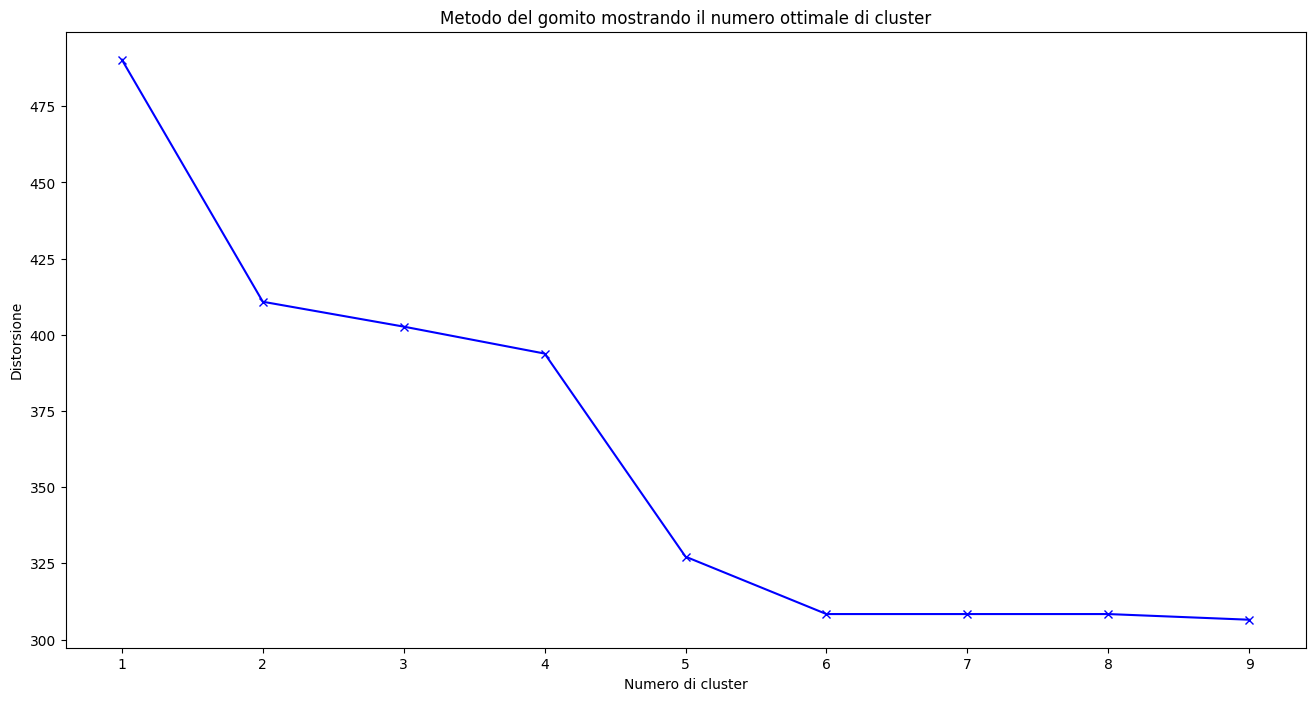

In [65]:
distortions = []
K = range(1,10)  # Cambia in base al tuo dataset e alle tue esigenze
for k in K:
    kmeanModel = KMedoids(n_clusters=k)
    kmeanModel.fit(df_final)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Numero di cluster')
plt.ylabel('Distorsione')
plt.title('Metodo del gomito mostrando il numero ottimale di cluster')

In [ ]:
clusters = KPrototypes(n_clusters = 3).fit_predict(df_final, categorical=[0])
import itertools
feature_combinations = list(itertools.combinations(df_final.columns, 2))

# Create scatter plots for each feature combination
for i, (feature1, feature2) in enumerate(feature_combinations, start=1):
    plt.figure(figsize=(8, 6))
    plt.scatter(df_final[feature1], df_final[feature2], c=clusters, cmap='viridis', s=50)
    #plt.scatter(KPrototypes.cluster_centers_[:, df_final.columns.get_loc(feature1)], 
               # KPrototypes.cluster_centers_[:, df_final.columns.get_loc(feature2)], 
                #s=200, c='red', marker='X', label='Centroids')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Clusters for {} vs {}'.format(feature1, feature2))
    plt.legend()
    plt.show()
    display(plt.gcf())  # Display the current figure explicitly

    # Limit the number of plots to display
    if i >= 29:  # Change this number based on how many plots you want to display at once
        break


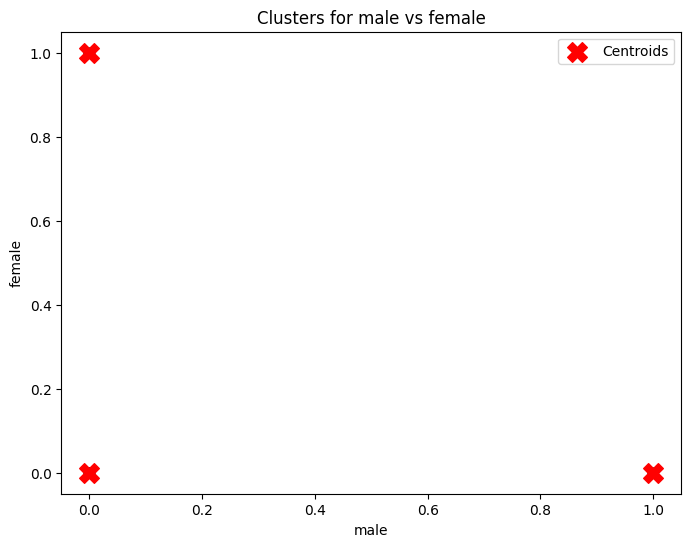

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

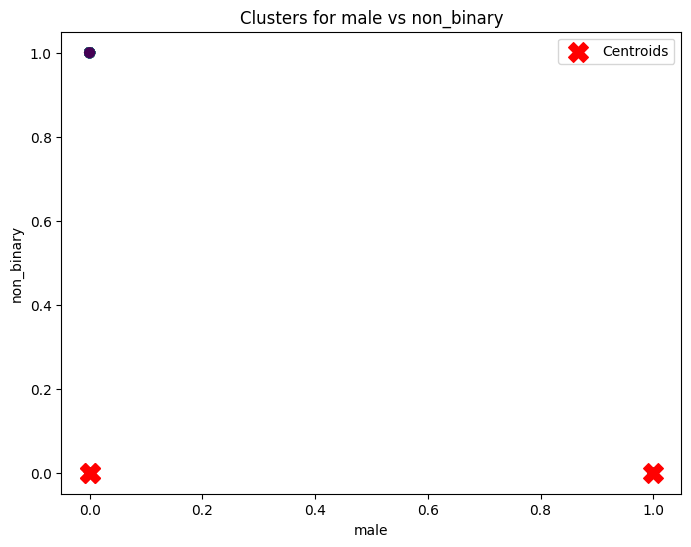

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

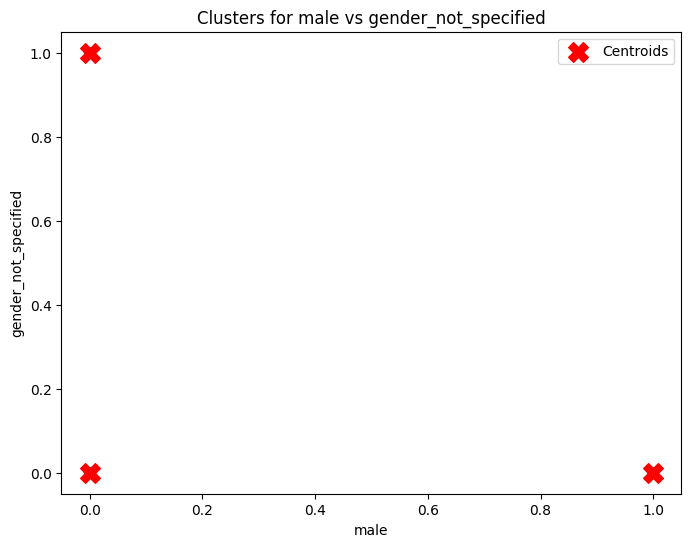

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

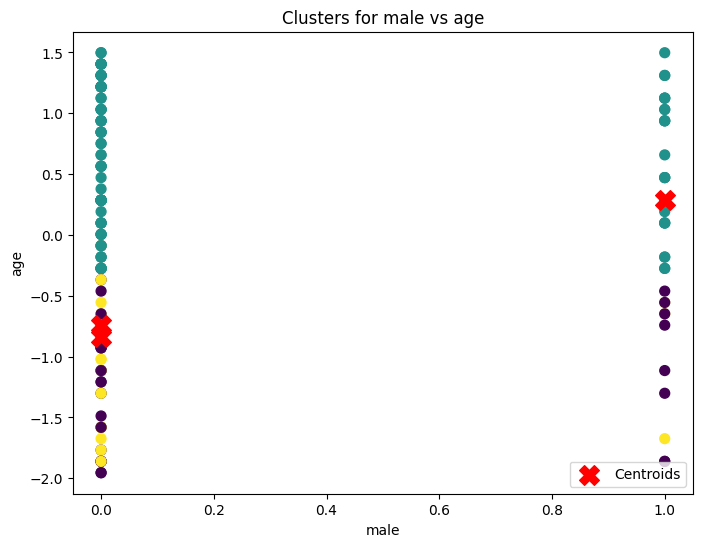

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

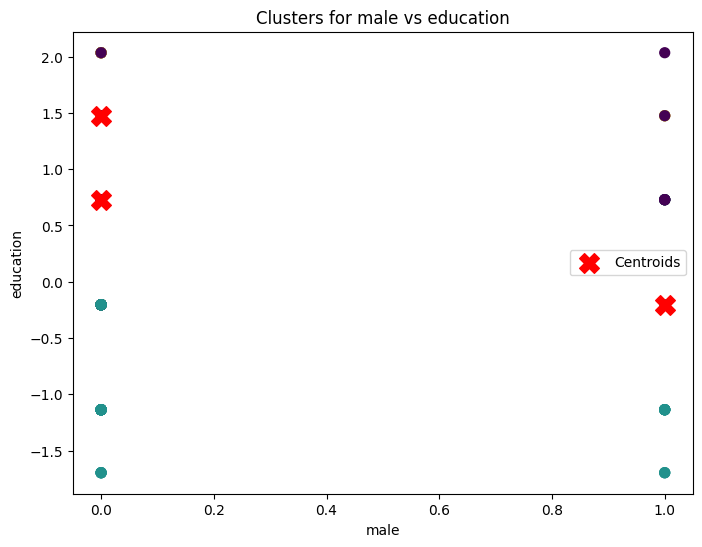

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

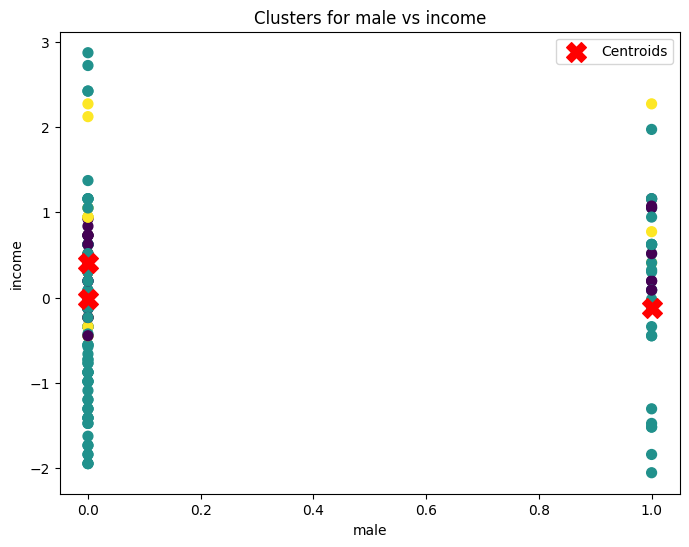

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

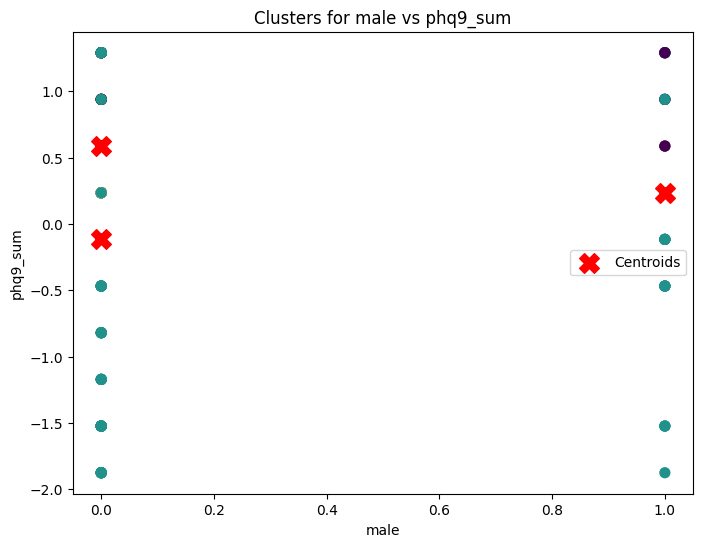

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

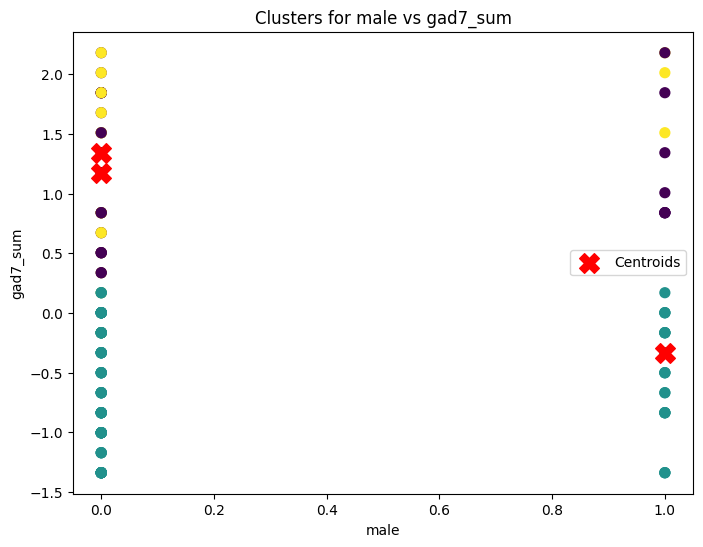

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

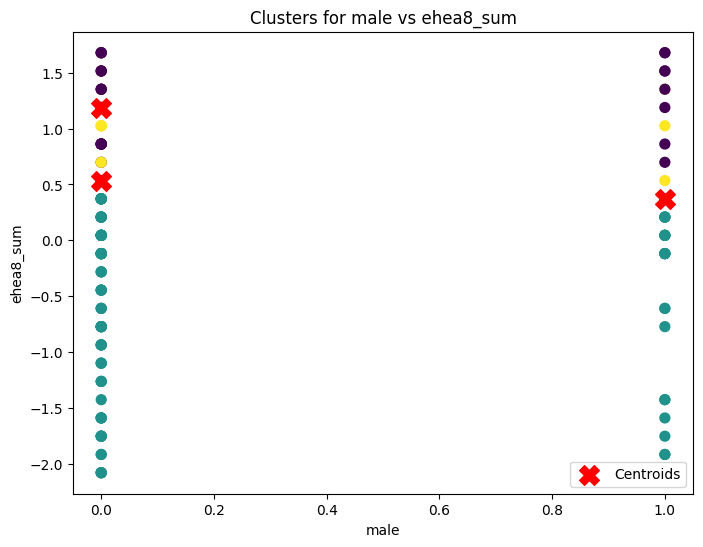

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

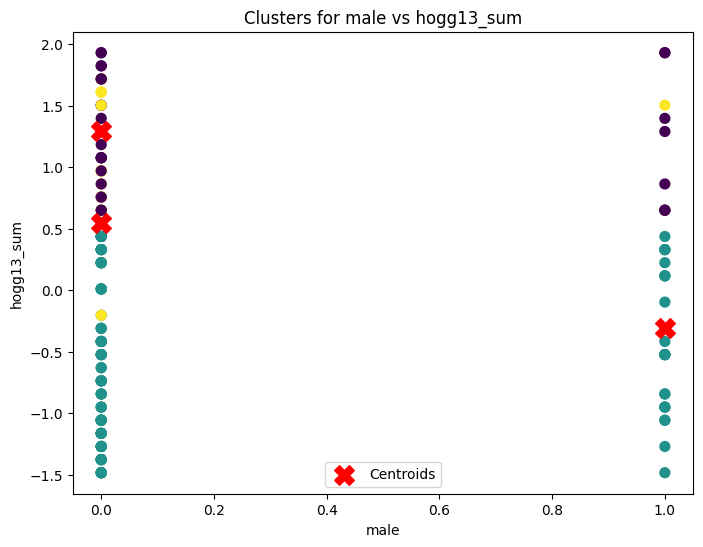

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

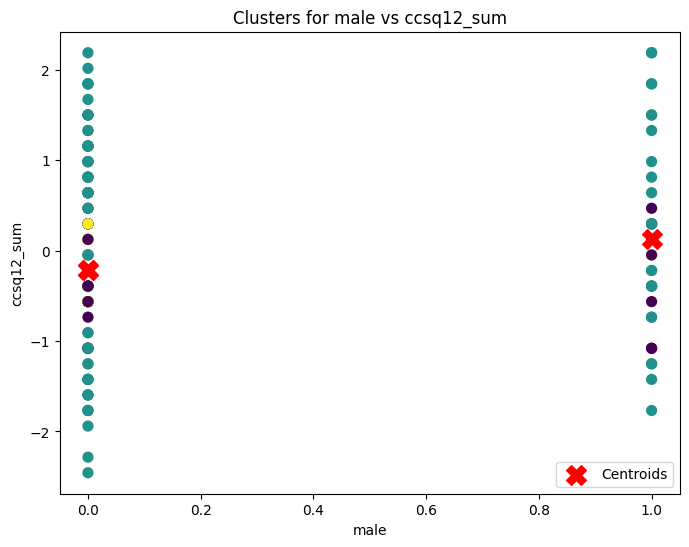

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

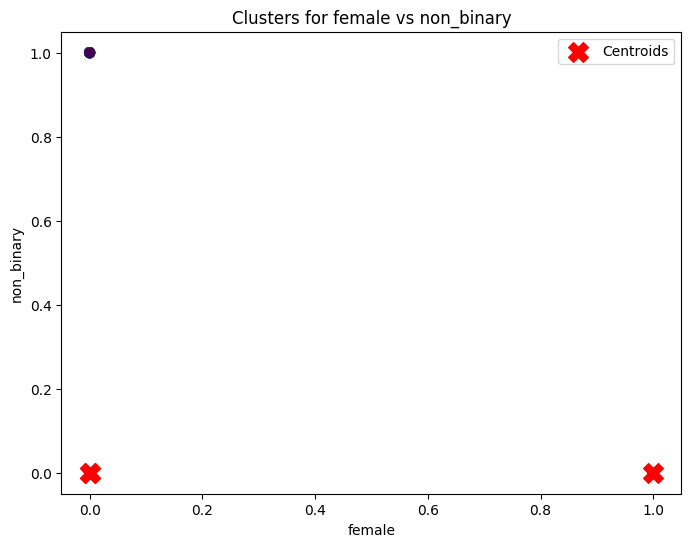

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

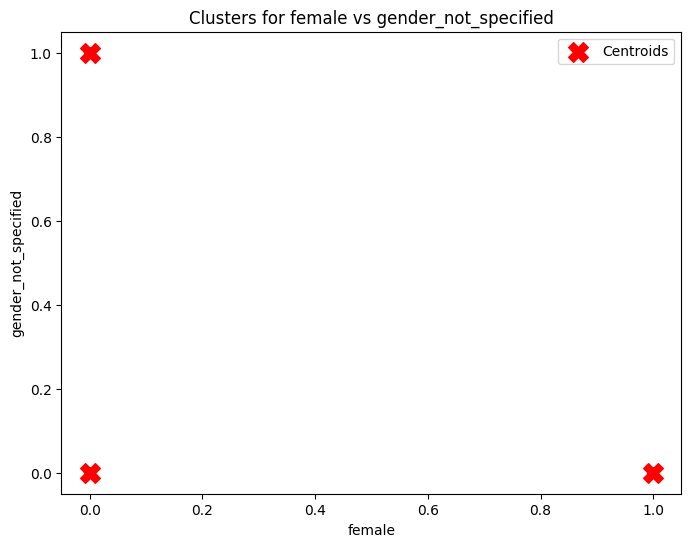

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

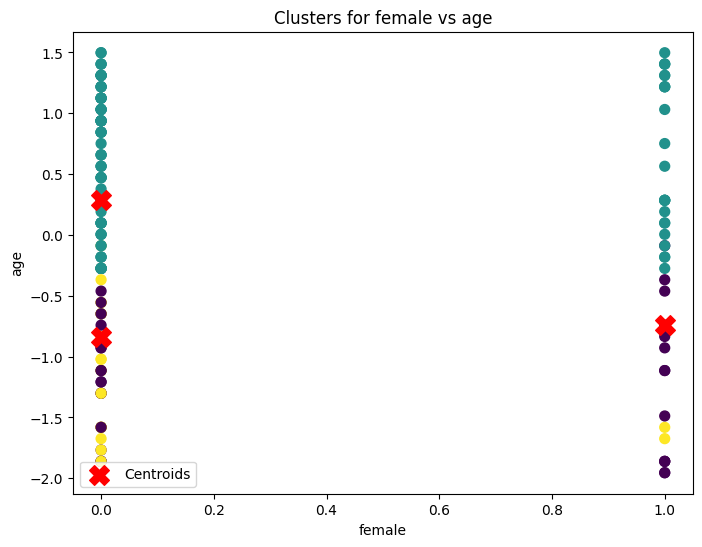

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

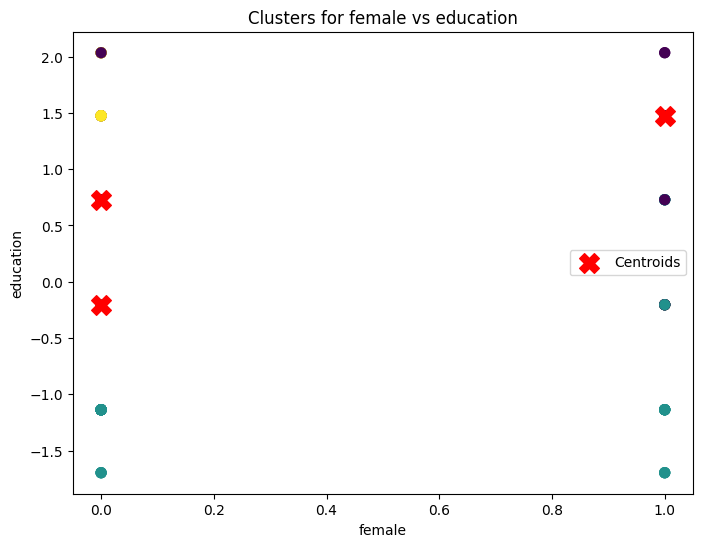

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

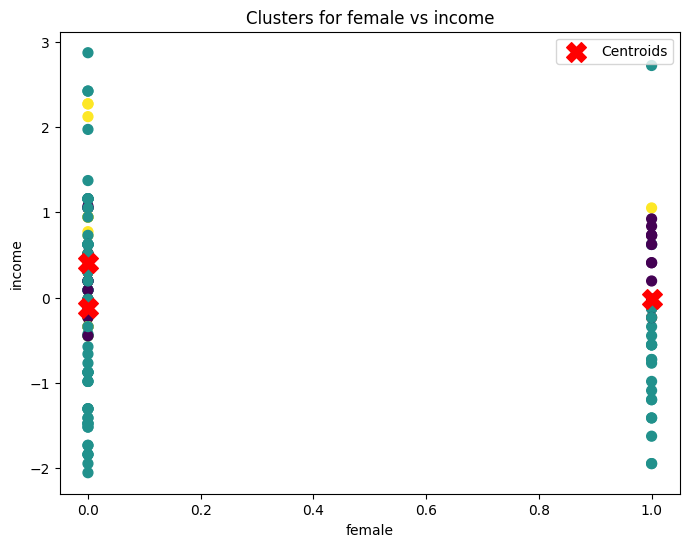

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

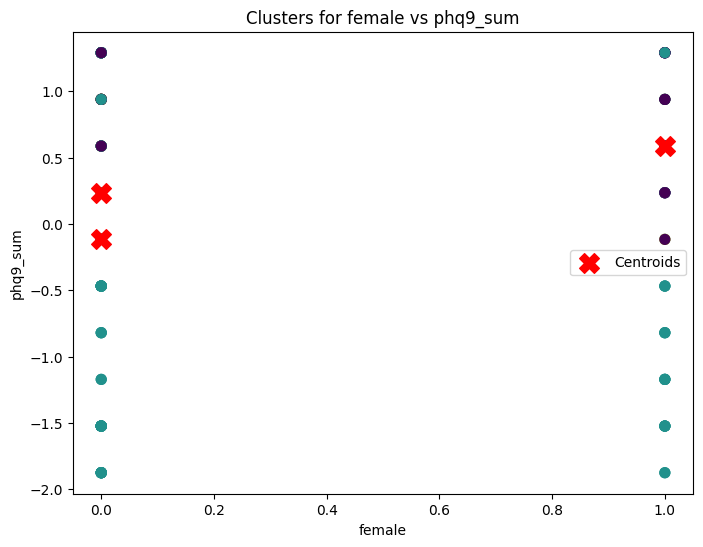

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

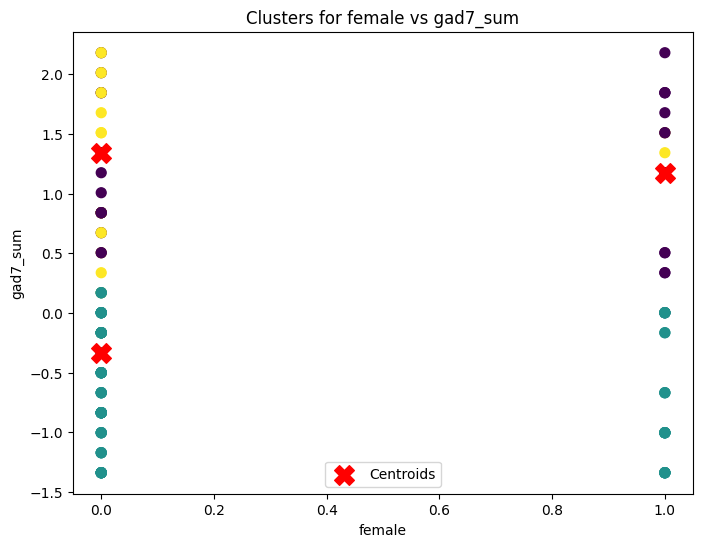

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

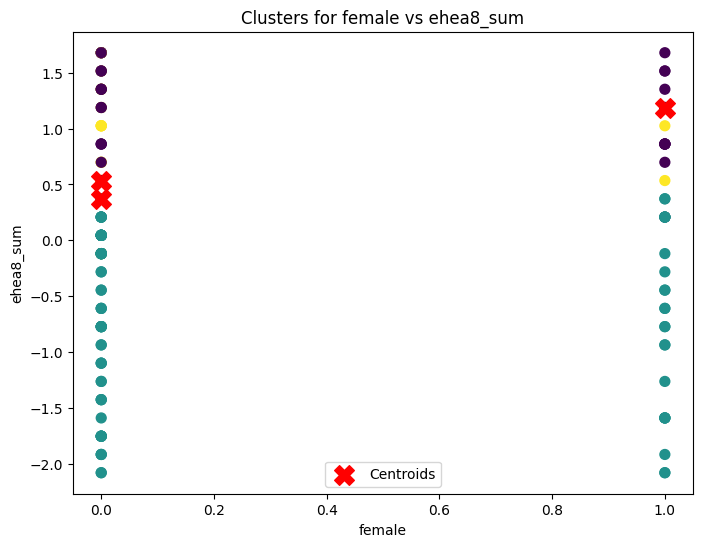

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

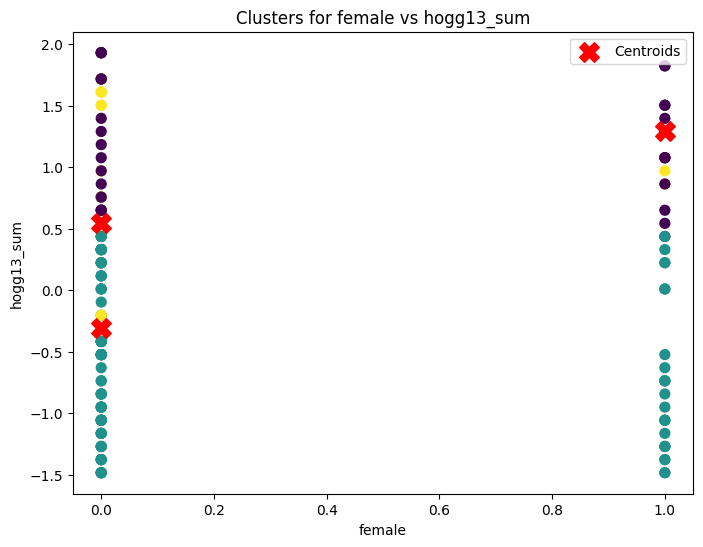

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

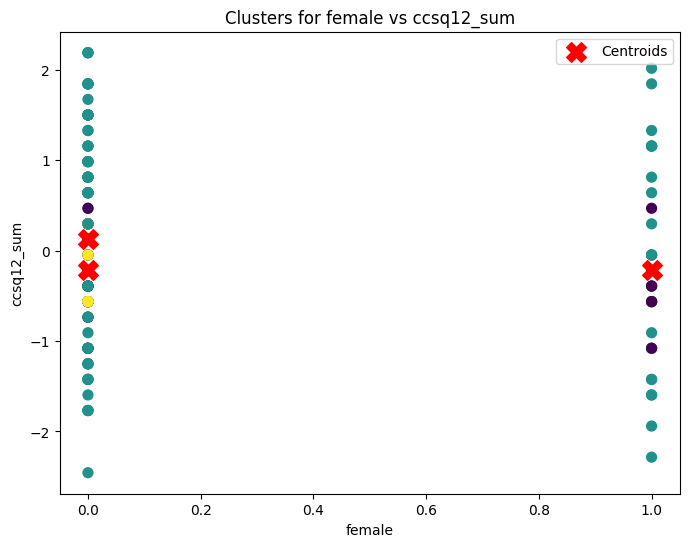

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

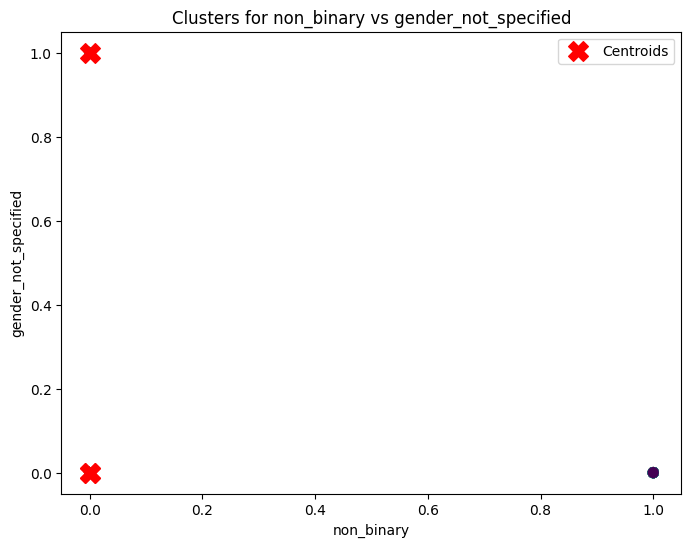

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

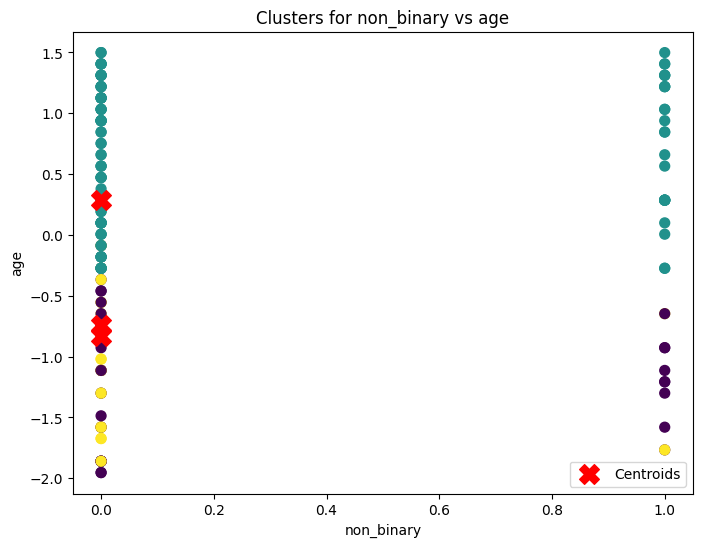

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

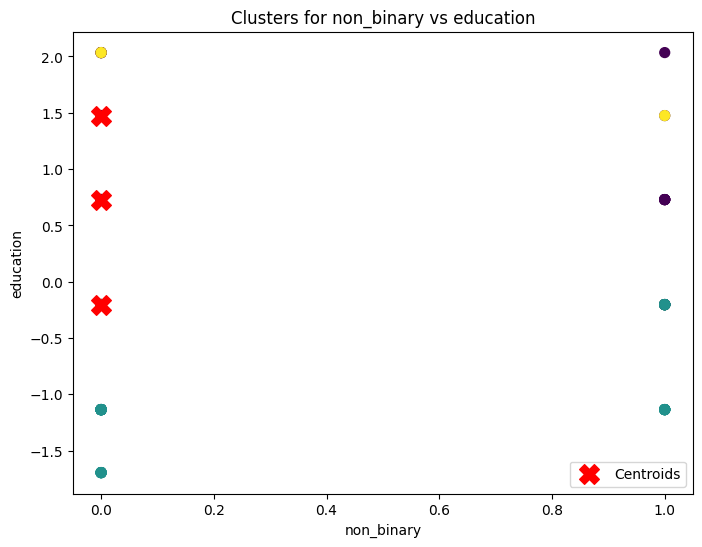

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

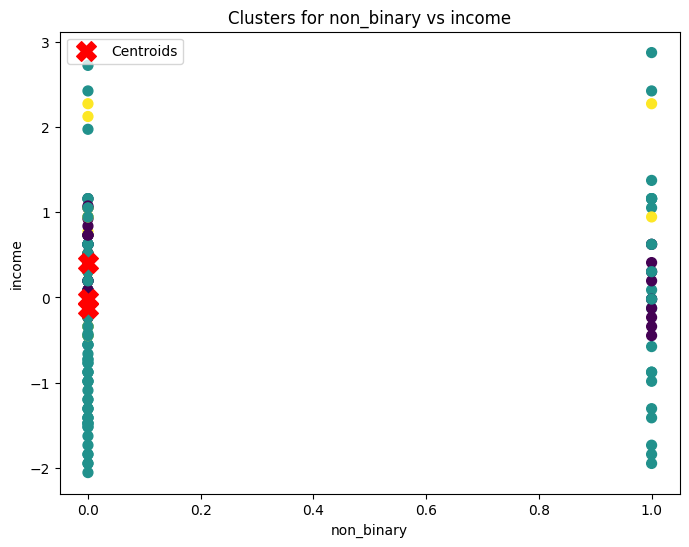

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

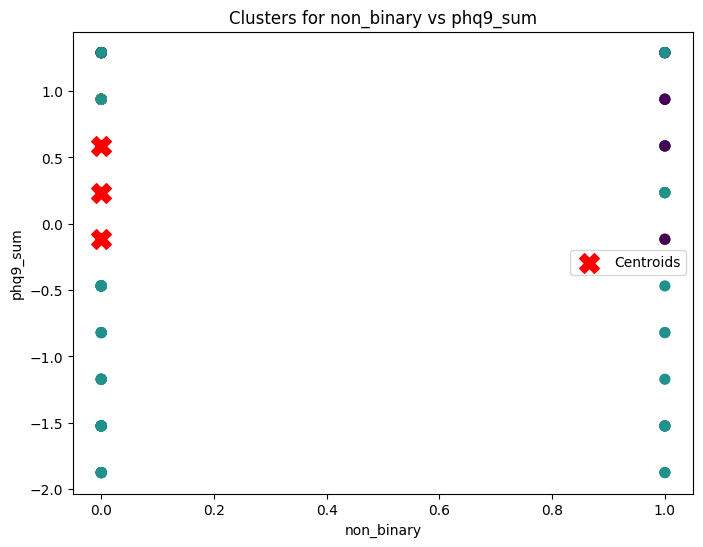

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

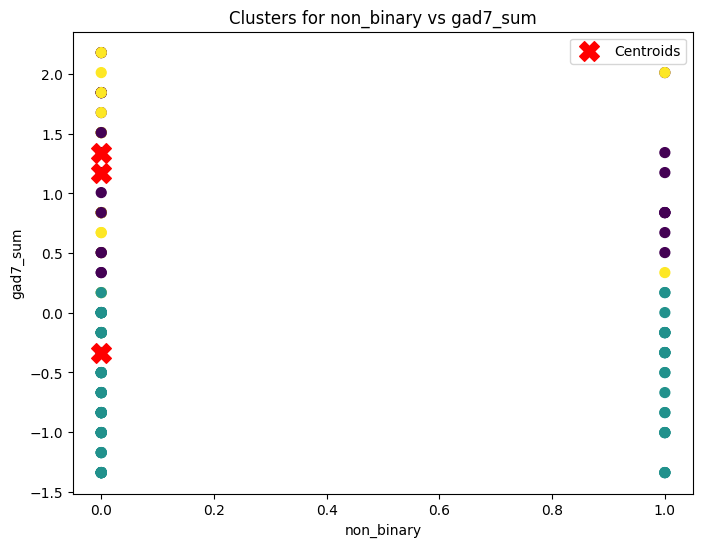

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

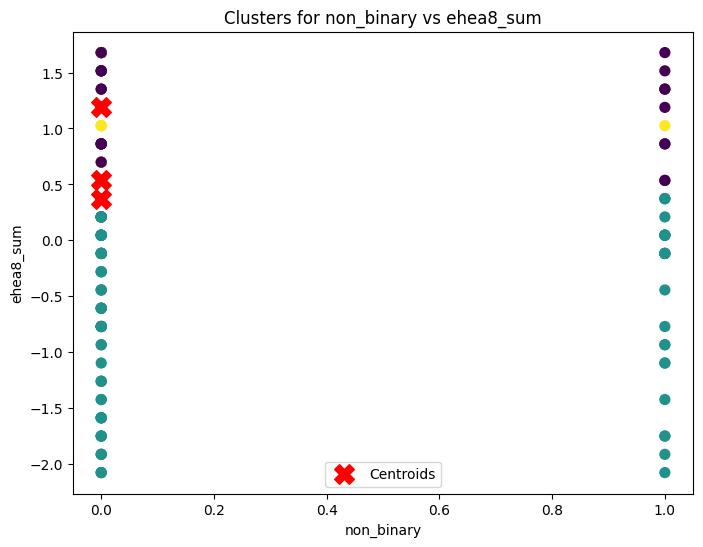

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

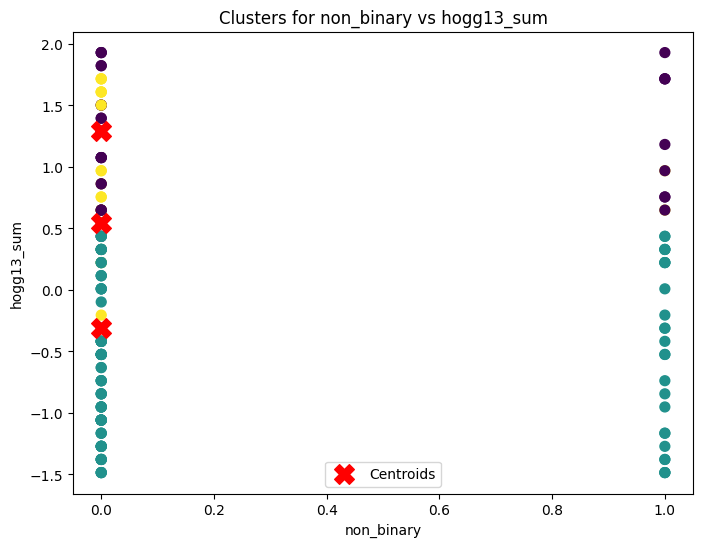

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

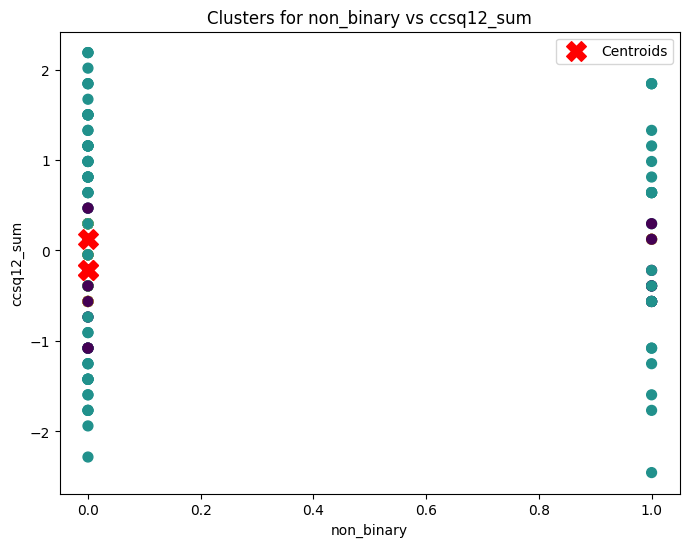

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

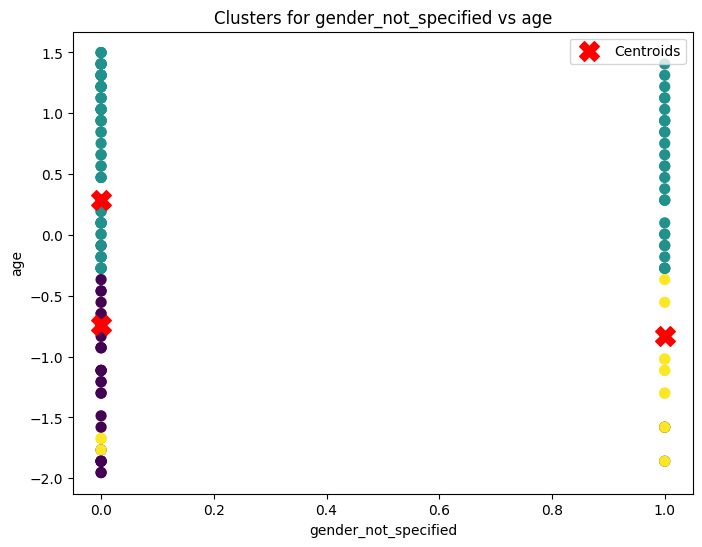

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

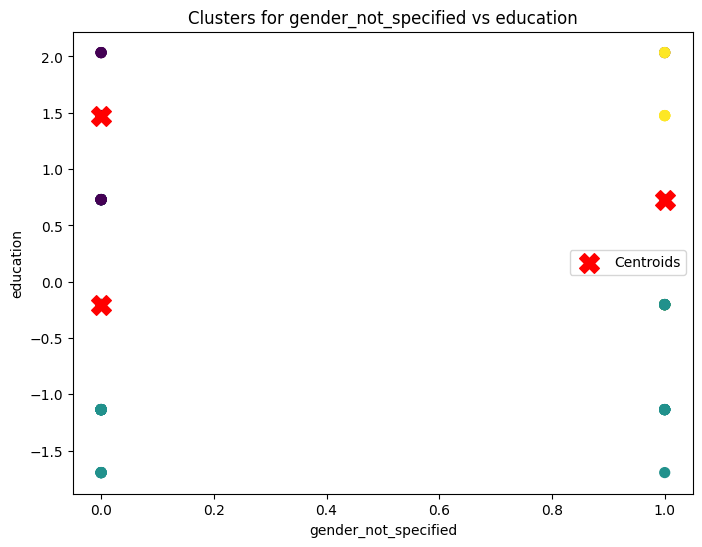

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

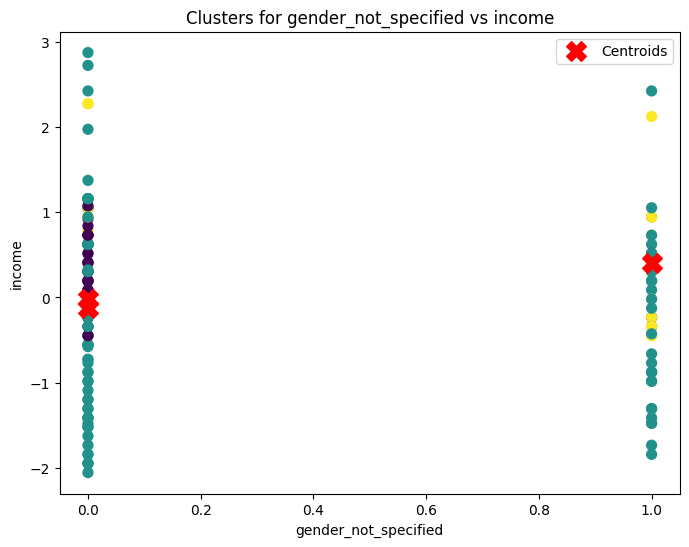

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

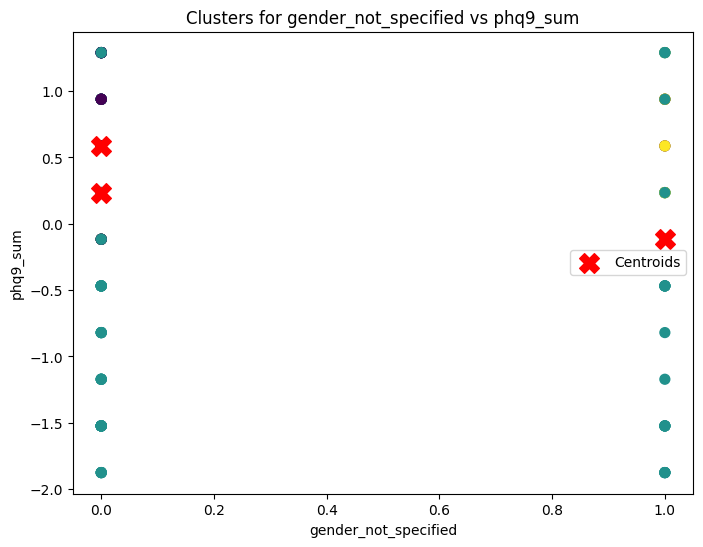

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

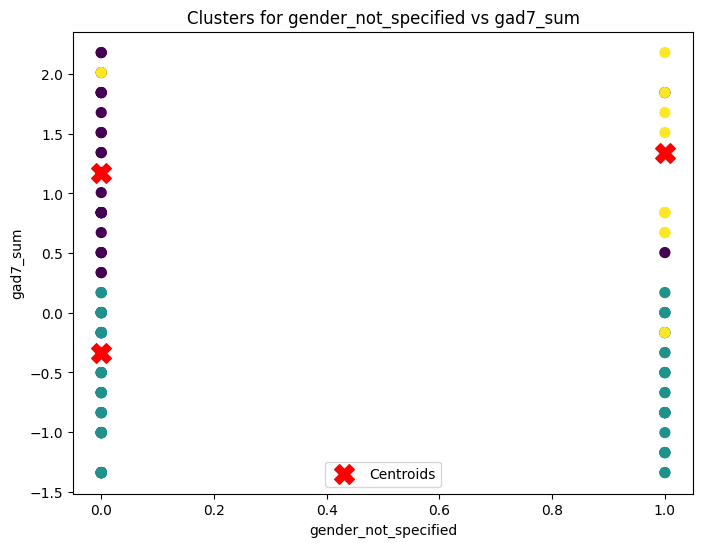

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

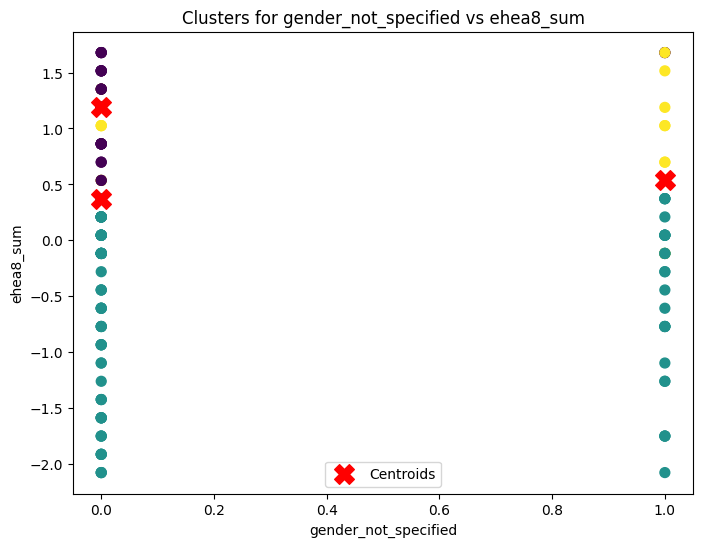

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

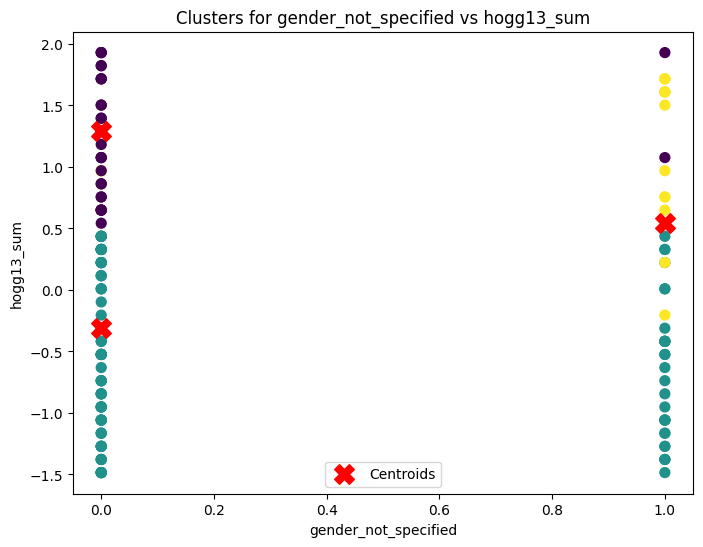

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

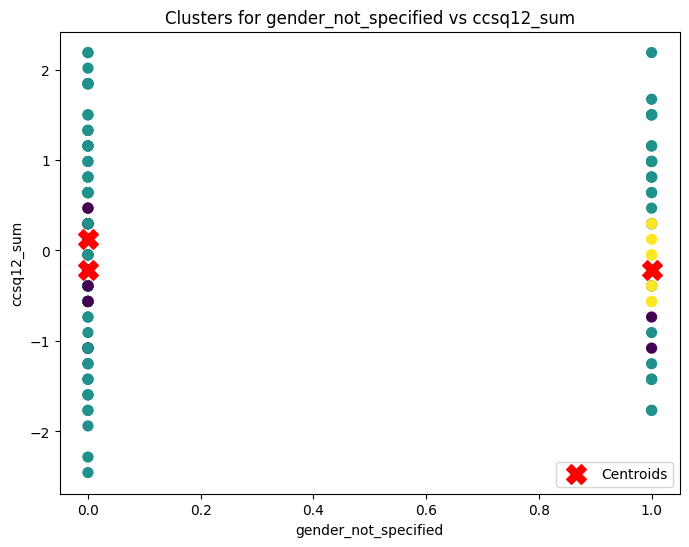

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

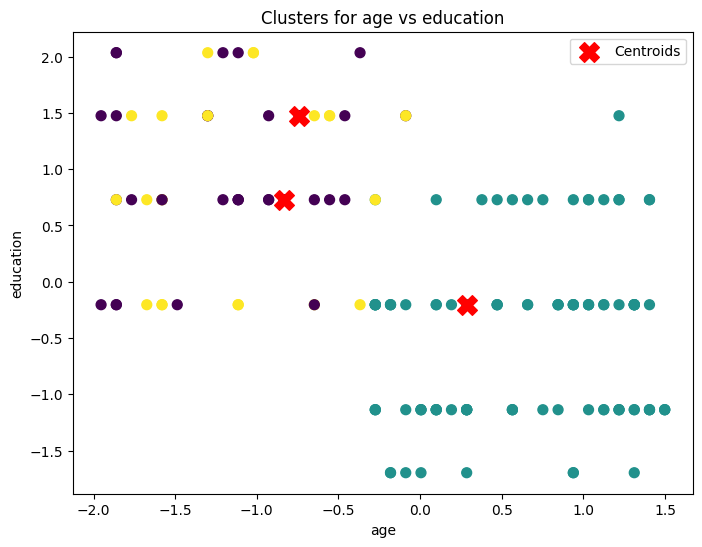

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

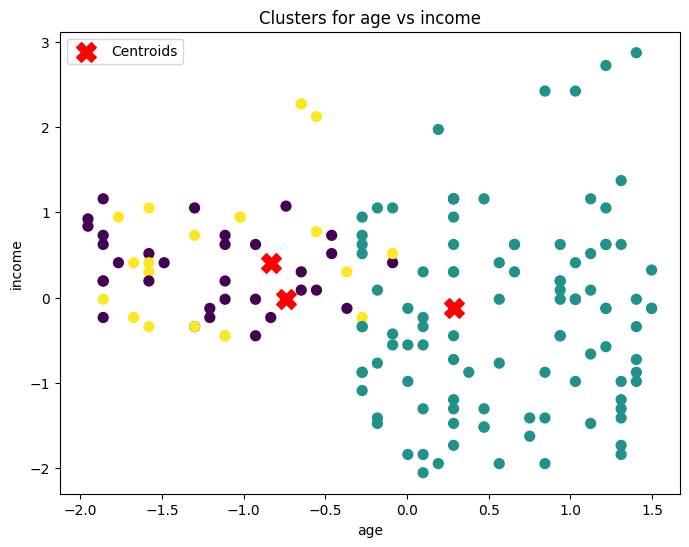

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

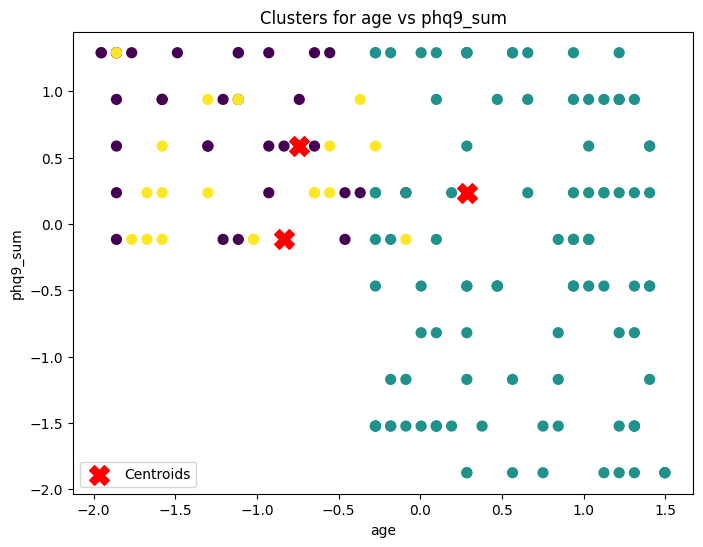

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

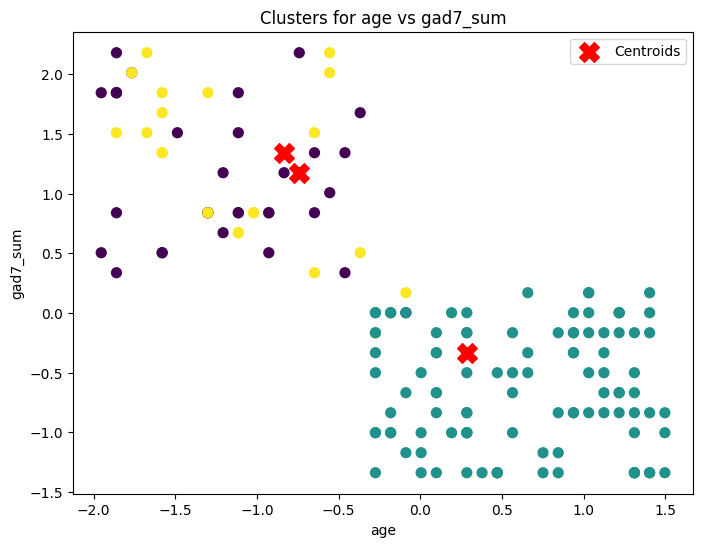

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

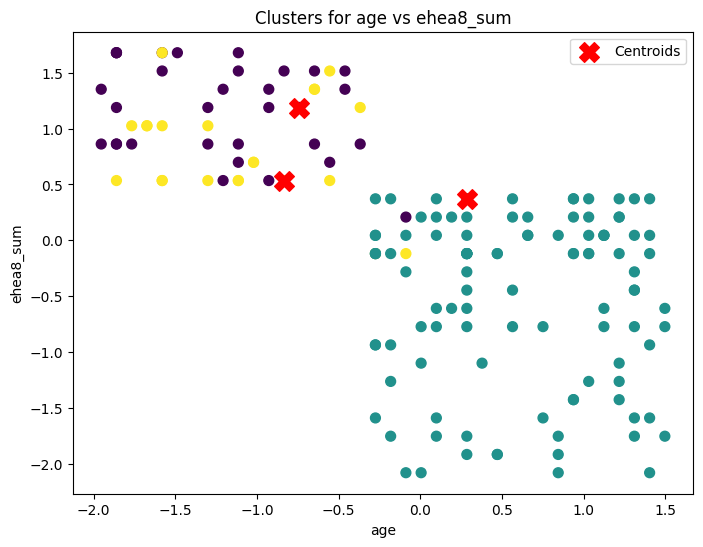

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

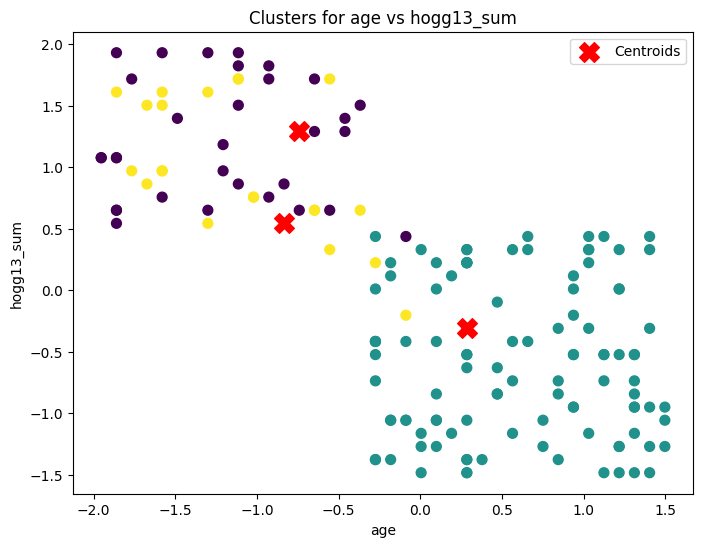

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

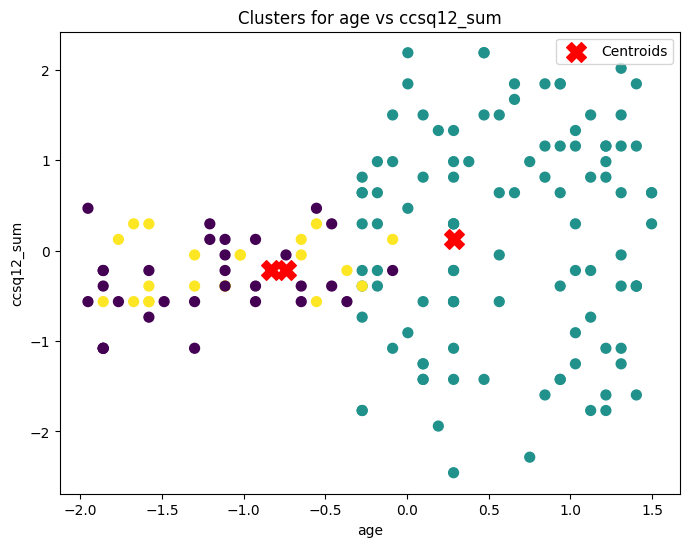

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

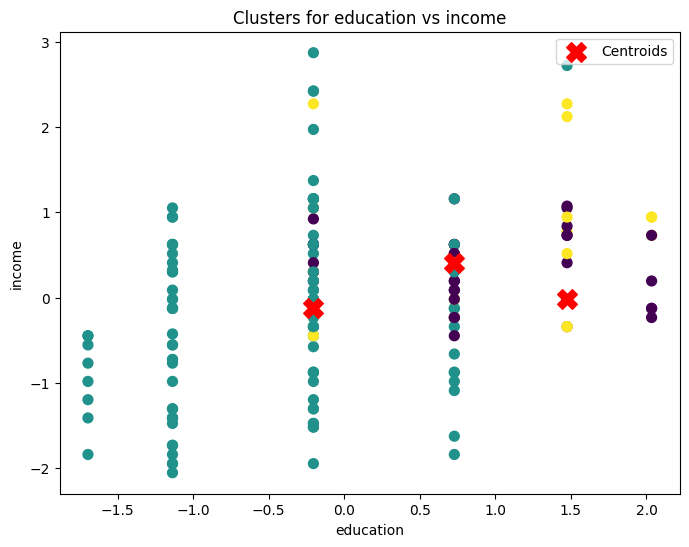

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

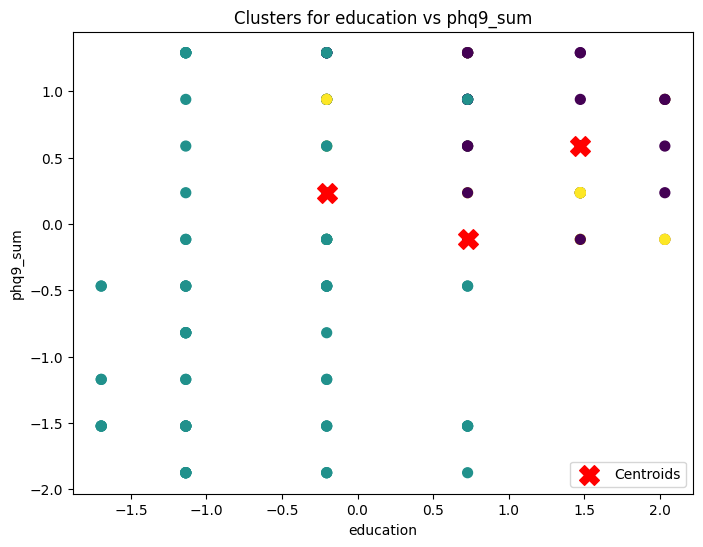

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

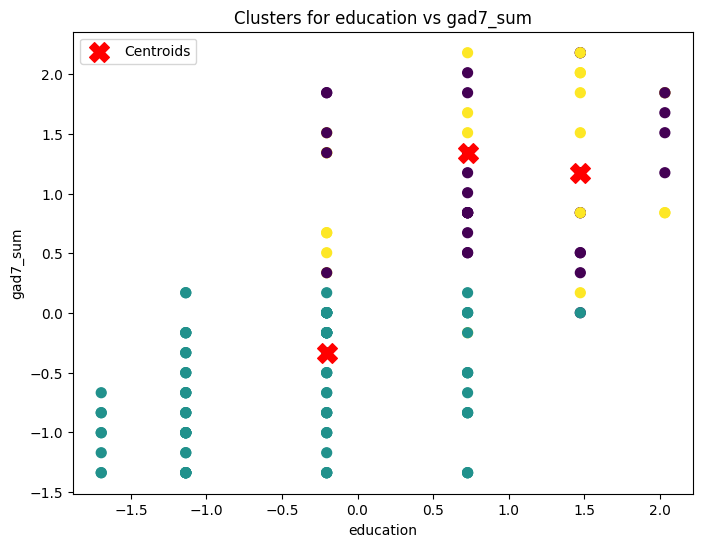

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

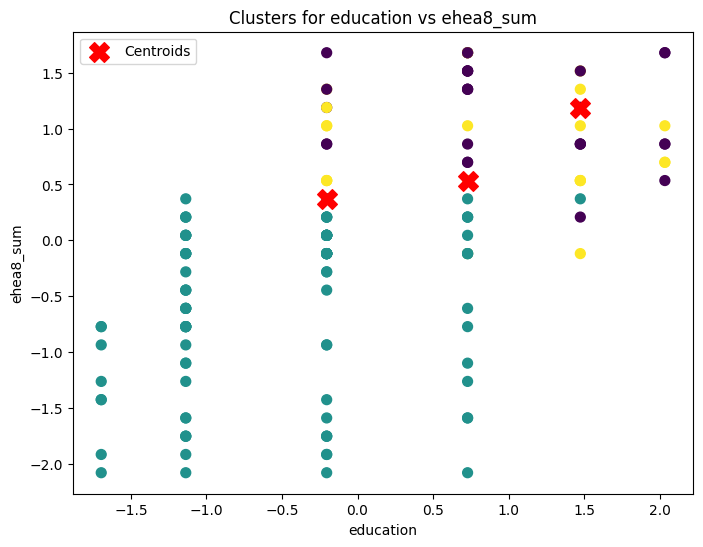

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

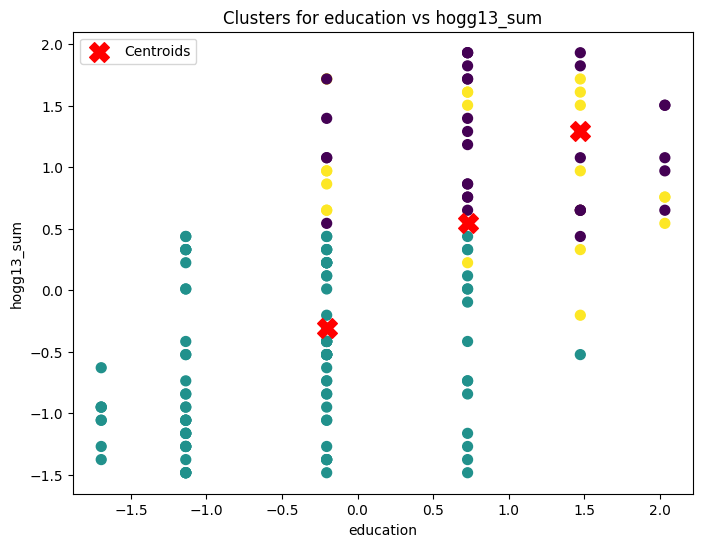

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

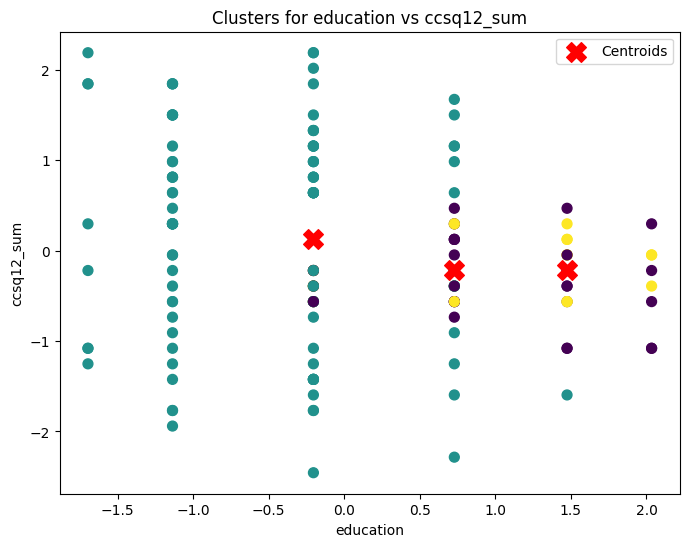

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

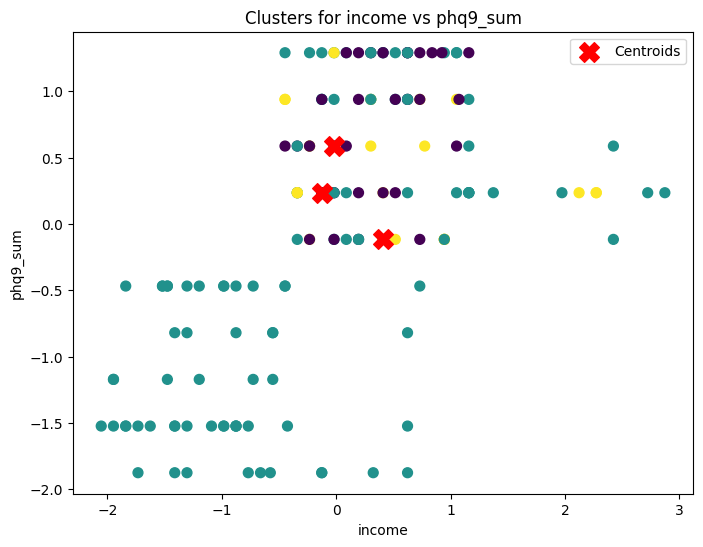

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

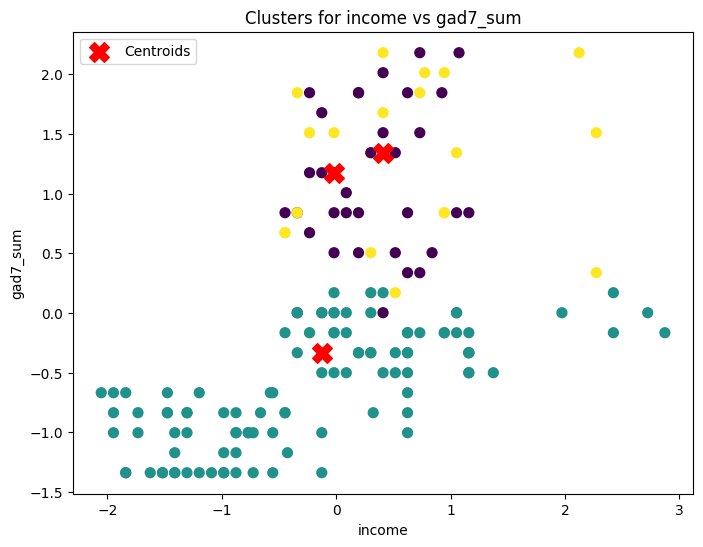

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

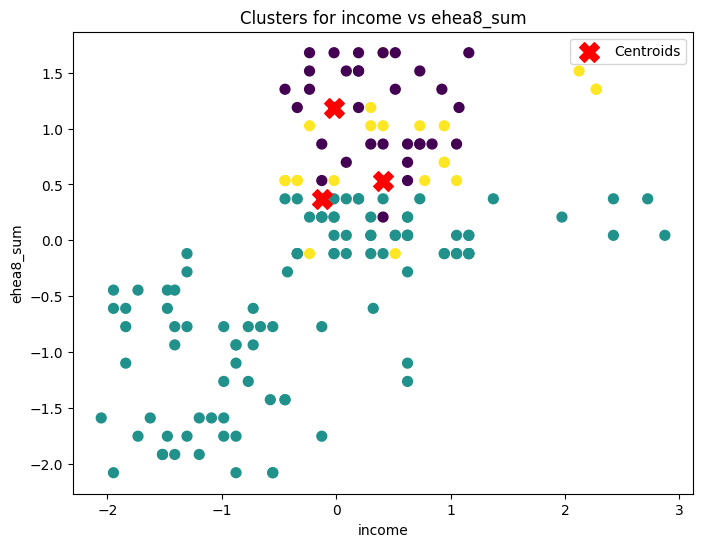

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

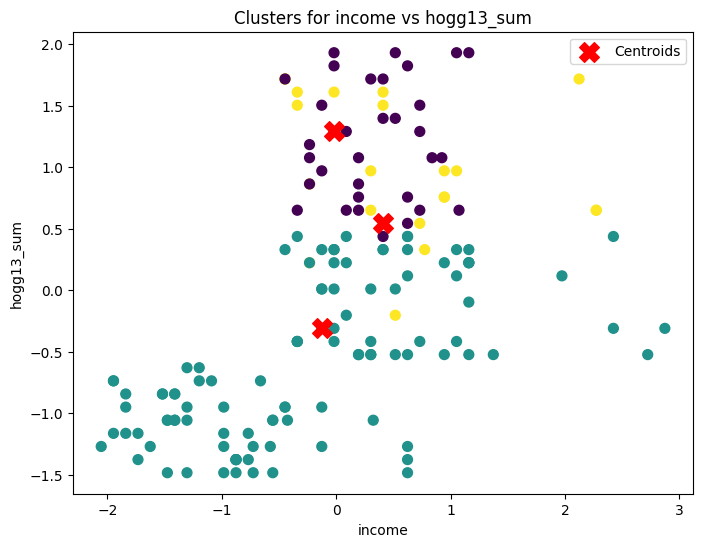

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

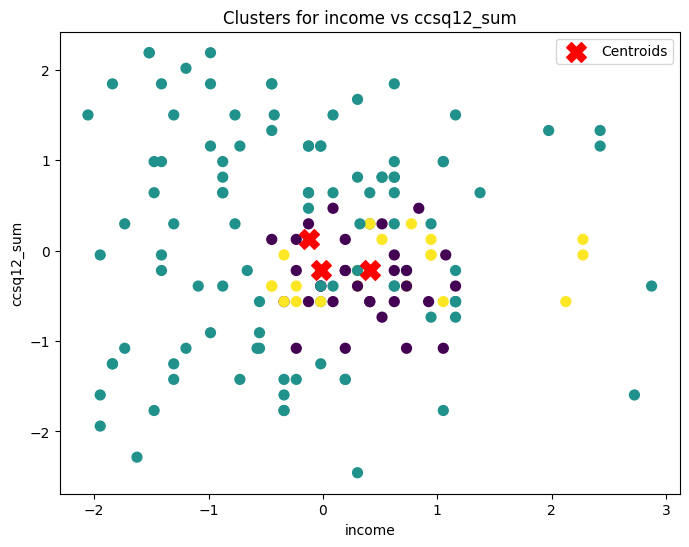

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

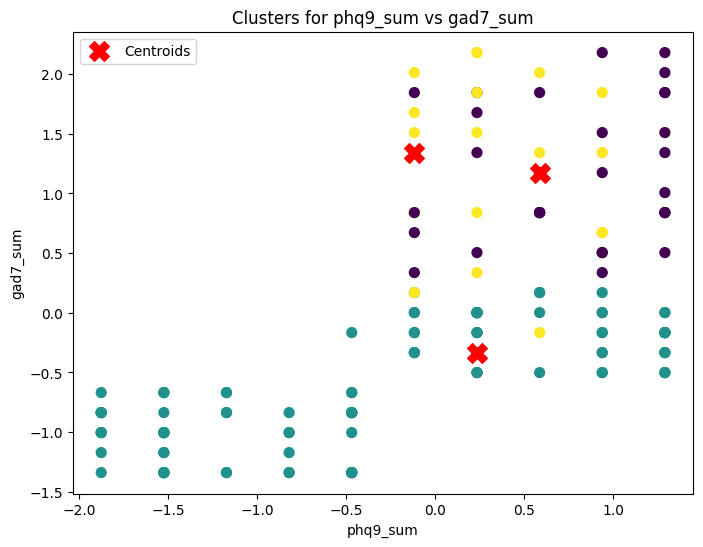

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

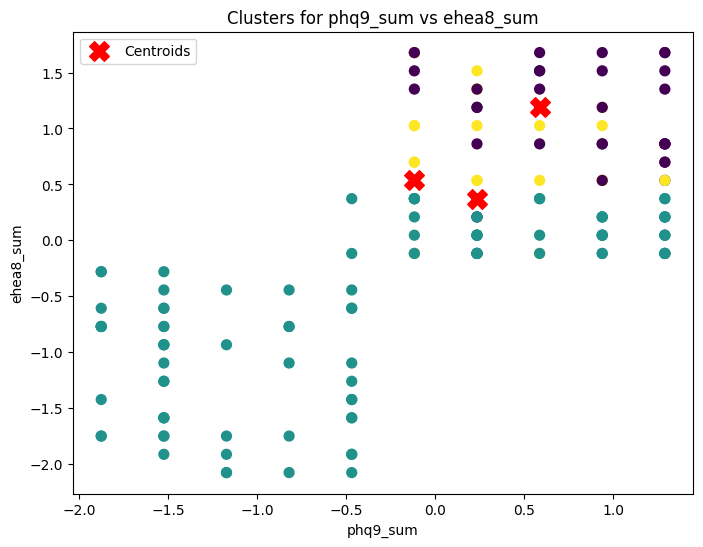

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

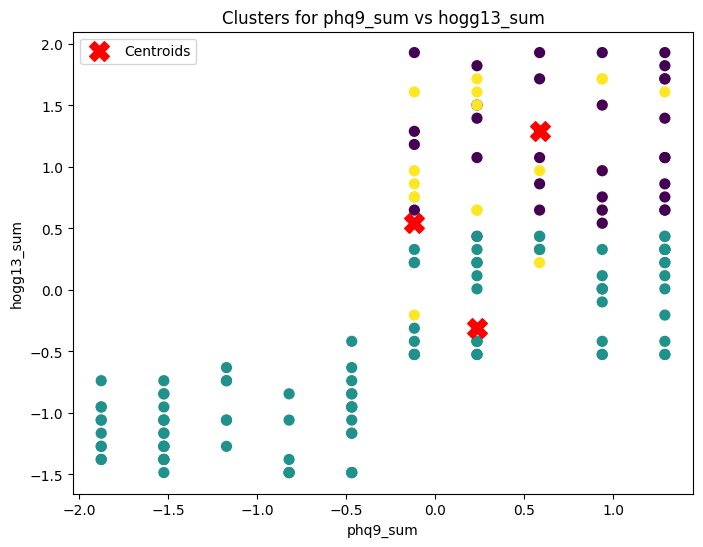

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

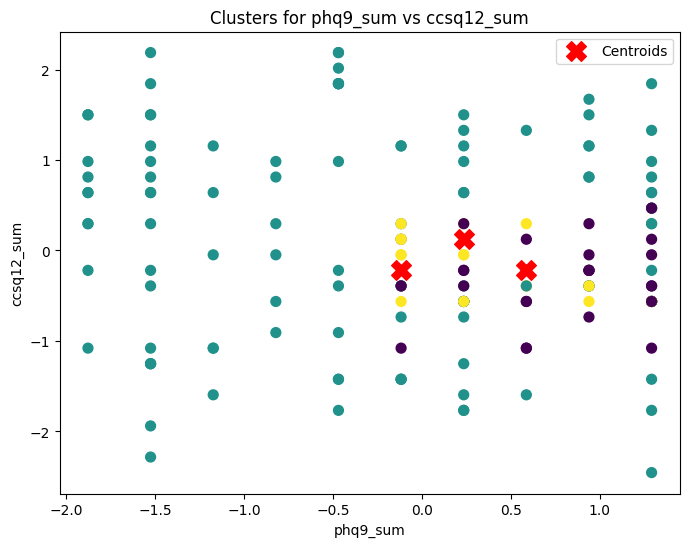

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

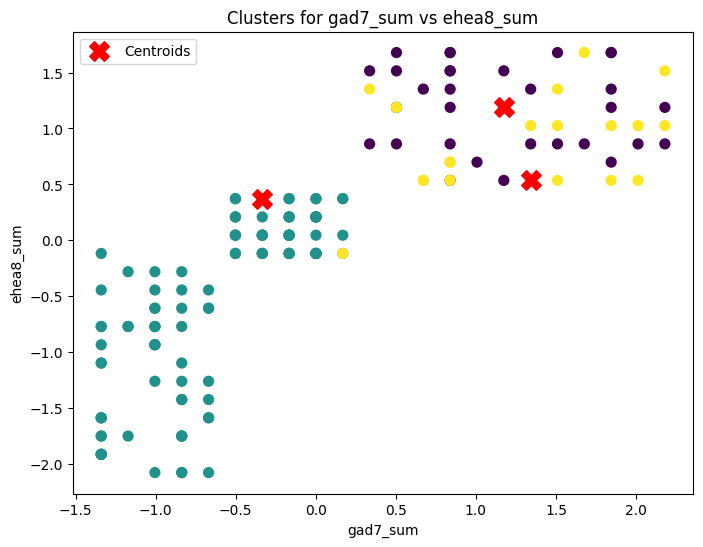

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

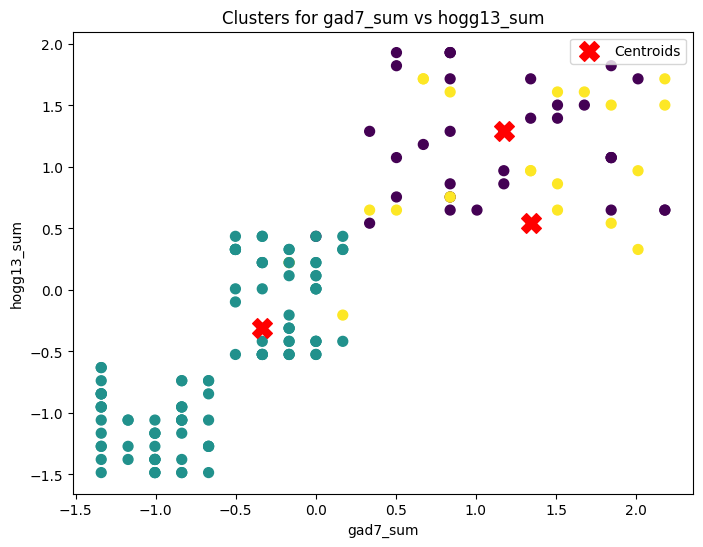

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

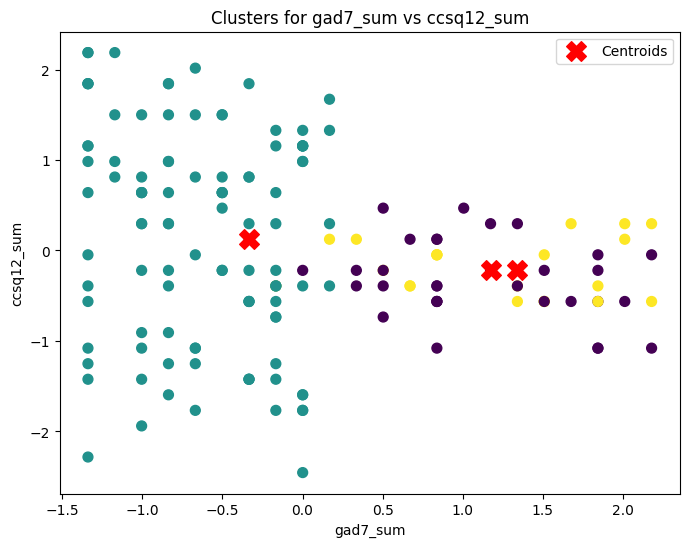

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

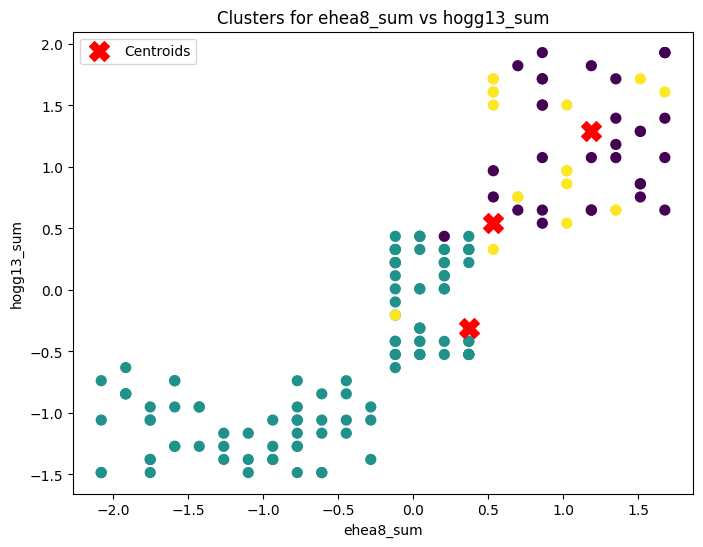

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

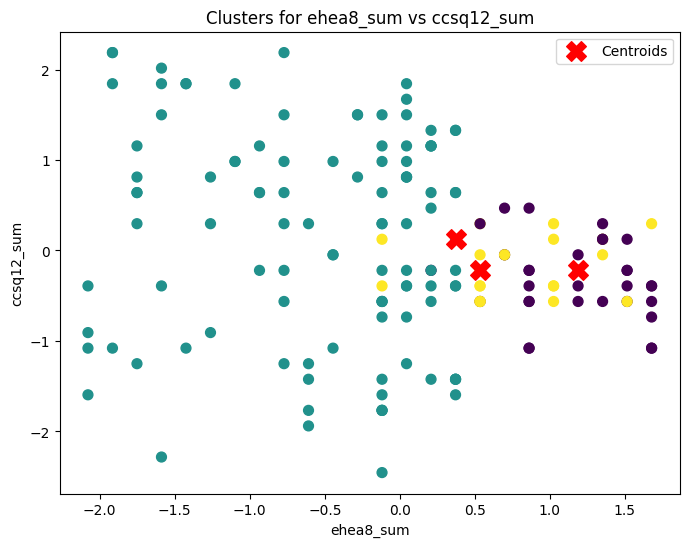

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

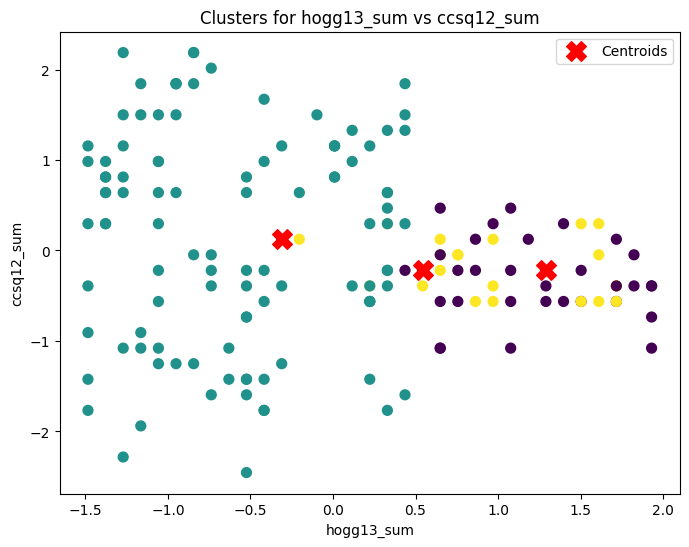

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [69]:

optimal_k = 3  # Replace this with the optimal number of clusters you found

# Apply KMeans with the optimal number of clusters
kmedoids = KMedoids(n_clusters=optimal_k, random_state=0)
#clusters = KPrototypes().fit_predict(df_final, categorical=[0])
clusters = kmedoids.fit_predict(df_final[['male','female','non_binary','gender_not_specified','age', 'education', 'income', 'phq9_sum', 'gad7_sum', 'ehea8_sum',
       'hogg13_sum', 'ccsq12_sum']])

# Get all possible combinations of features
import itertools
feature_combinations = list(itertools.combinations(df_final.columns, 2))

# Create scatter plots for each feature combination
for i, (feature1, feature2) in enumerate(feature_combinations, start=1):
    plt.figure(figsize=(8, 6))
    plt.scatter(df_final[feature1], df_final[feature2], c=clusters, cmap='viridis', s=50)
    plt.scatter(kmedoids.cluster_centers_[:, df_final.columns.get_loc(feature1)], 
                kmedoids.cluster_centers_[:, df_final.columns.get_loc(feature2)], 
                s=200, c='red', marker='X', label='Centroids')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Clusters for {} vs {}'.format(feature1, feature2))
    plt.legend()
    plt.show()
    display(plt.gcf())  # Display the current figure explicitly

    # Limit the number of plots to display
    if i >= 100:  # Change this number based on how many plots you want to display at once
        break


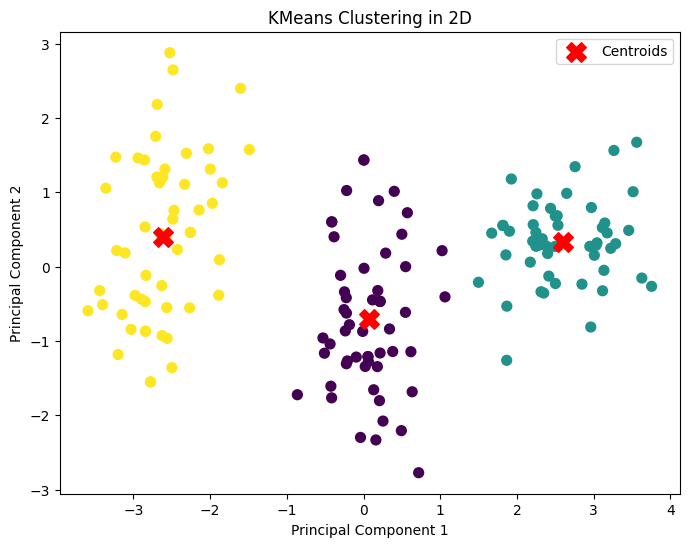

In [32]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_final[['male','female','non_binary','gender_not_specified','age','education','income', 'phq9_sum','gad7_sum','ehea8_sum','hogg13_sum', 'ccsq12_sum']])

# Apply KMeans on the reduced data
clusters = kmeans.fit_predict(reduced_data)

# Visualize the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering in 2D')
plt.legend()
plt.show()

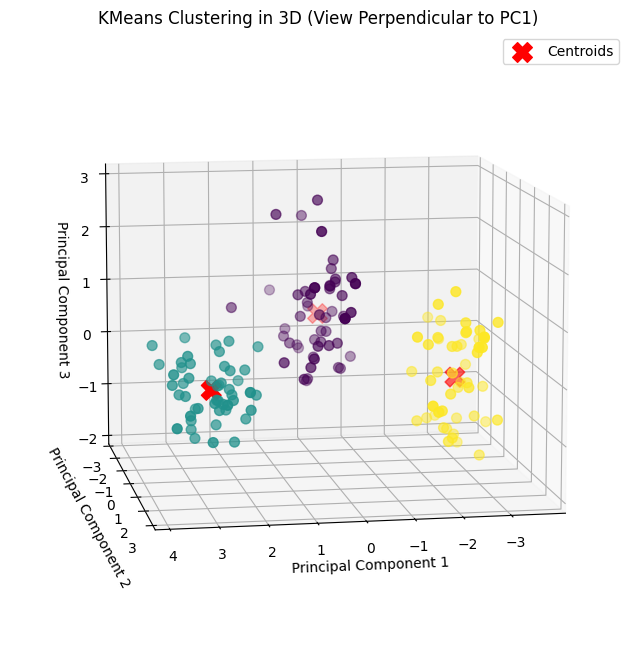

In [33]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# Apply PCA to reduce the data to 3D
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(df_final[['male','female','non_binary','gender_not_specified','age','education','income', 'phq9_sum','gad7_sum','ehea8_sum','hogg13_sum', 'ccsq12_sum']])

# Apply KMeans on the reduced 3D data
kmeans_3d = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
clusters_3d = kmeans_3d.fit_predict(reduced_data_3d)

# Visualize the clusters in 3D with a view perpendicular to the first component
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the view perpendicular to the first component
elevation = 10  # Set the elevation angle
azimuth = 80     # Set the azimuthal angle (0 for view from the top, 90 for view from the side)

ax.view_init(elev=elevation, azim=azimuth)  # Set the view angles

ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=clusters_3d, cmap='viridis', s=50)
ax.scatter(kmeans_3d.cluster_centers_[:, 0], kmeans_3d.cluster_centers_[:, 1], kmeans_3d.cluster_centers_[:, 2], 
           s=200, c='red', marker='X', label='Centroids')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('KMeans Clustering in 3D (View Perpendicular to PC1)')
plt.legend()
plt.show()



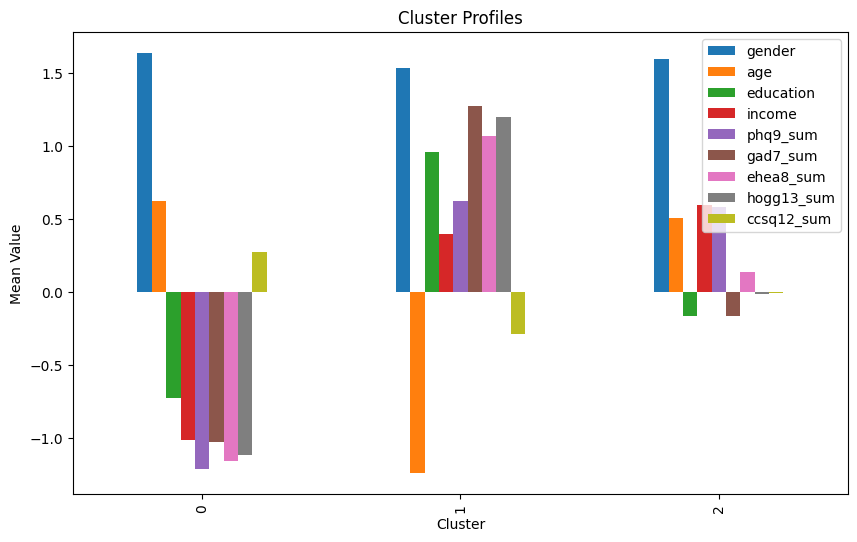

In [56]:
cluster_profiles = df_final.groupby(clusters).mean()

# Visualize cluster profiles as bar charts
cluster_profiles.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Cluster Profiles')
plt.legend(loc='upper right')
plt.show()

In [57]:
silhouette_score = metrics.silhouette_score(df_final, clusters)
calinski_harabasz_score = metrics.calinski_harabasz_score(df_final, clusters)
davies_bouldin_score = metrics.davies_bouldin_score(df_final, clusters)
print("silhouette means:"+str(silhouette_score))
print("calinski_harabasz_score means"+str(calinski_harabasz_score))
print("davies_bouldin_score means" + str(davies_bouldin_score))

silhouette means:0.3020571206672058
calinski_harabasz_score means92.34650883544462
davies_bouldin_score means1.3265777755348604
